# The curse of dimensionality

As the number of dimensions increase, observations are found most often near the edges of the hypercube. 
- Random data sparsely distributed in high dimensions
- Expected error of inference increases with dimension

To get the most out of our data and machine learning, we want to reduce the number of dimensions of our observations to the most importaant for the task.

Let's sample 1000 points in $[-1,1]^2$ with each dimension iid uniform in [-1,1]. 

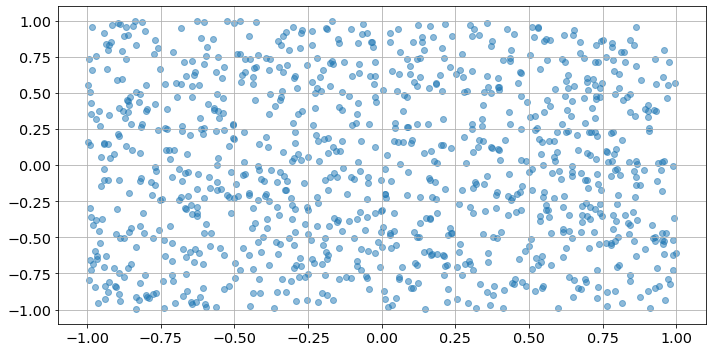

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

numpoints = 1000
randomvecs = np.random.uniform(-1,1,[numpoints,2])

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
fig, ax = plt.subplots(); 
hand = ax.scatter(randomvecs[:,0],randomvecs[:,1],alpha=0.5); 
fig.tight_layout(); plt.grid(); plt.show()

# Distance between points

We now compute the Euclidean distance between each unique pair of points

In [2]:
distRecord = []
for ii in np.arange(0,randomvecs.shape[0]-1):
  for jj in np.arange(ii+1,randomvecs.shape[0]):
    distRecord.append(np.sqrt(np.sum( ( randomvecs[ii,:]-randomvecs[jj,:] )**2 )))

# Distribution of distances

Let's make a histogram of these distances and plot it.

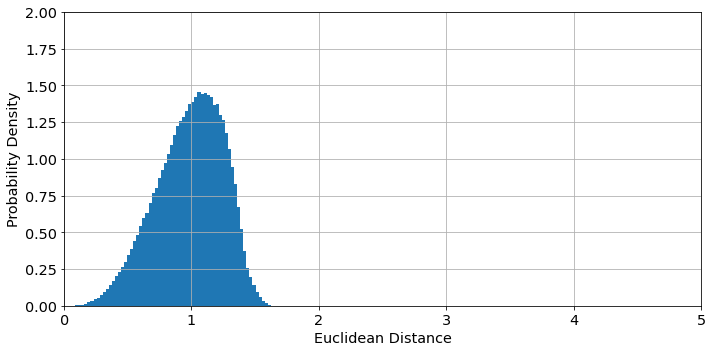

In [9]:
fig, ax = plt.subplots()
N, bins, _ = ax.hist(np.sqrt(distRecord),67,density=True)
ax.set(xlim=[0,5],ylim=[0,2])
ax.set(ylabel='Probability Density',xlabel='Euclidean Distance')
fig.tight_layout(); plt.grid(); plt.show()

# Distance between nearest points

We now compute the Euclidean distance between each point and its nearest neighbor.

In [10]:
distNNRecord = []
for ii in np.arange(0,randomvecs.shape[0]-1):
  distRecord = []
  for jj in np.arange(ii+1,randomvecs.shape[0]):
    distRecord.append(np.sqrt( np.sum( ( randomvecs[ii,:]-randomvecs[jj,:] )**2 ) ))
  distNNRecord.append(np.min(distRecord))

# Distribution of nearest distances

Let's make a histogram of these distances and plot it.

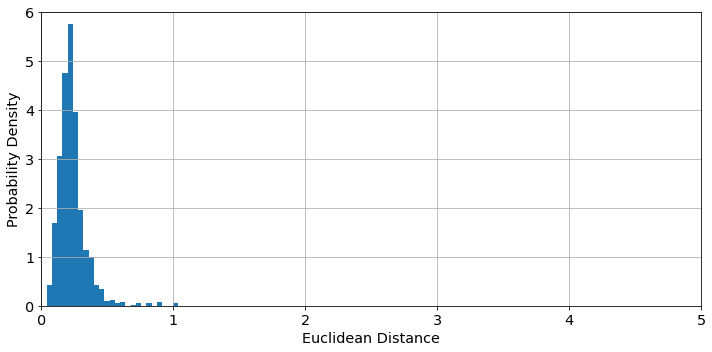

In [21]:
fig, ax = plt.subplots()
N, bins, _ = ax.hist(np.sqrt(distNNRecord),25,density=True)
ax.set(xlim=[0,5],ylim=[0,6])
ax.set(ylabel='Probability Density',xlabel='Euclidean Distance')
fig.tight_layout(); plt.grid(); plt.show()

Let's do the same with a sample of 1000 points in $[-1,1]^{10}$. 

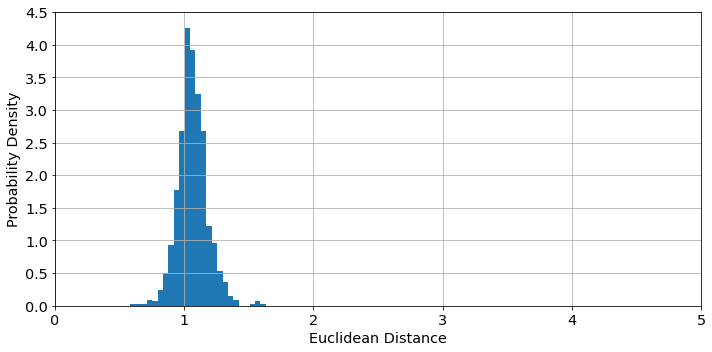

In [25]:
randomvecs = np.random.uniform(-1,1,[numpoints,10])
distNNRecord = []
for ii in np.arange(0,randomvecs.shape[0]-1):
  distRecord = []
  for jj in np.arange(ii+1,randomvecs.shape[0]):
    distRecord.append(np.sqrt( np.sum( ( randomvecs[ii,:]-randomvecs[jj,:] )**2 )))
  distNNRecord.append(np.min(distRecord))
fig, ax = plt.subplots()
N, bins, _ = ax.hist(np.sqrt(distNNRecord),25,density=True)
ax.set(xlim=[0,5],ylim=[0,4.5])
ax.set(ylabel='Probability Density',xlabel='Euclidean Distance')
fig.tight_layout(); plt.grid(); plt.show()

Let's do the same with a sample of 1000 points in $[-1,1]^{100}$. 

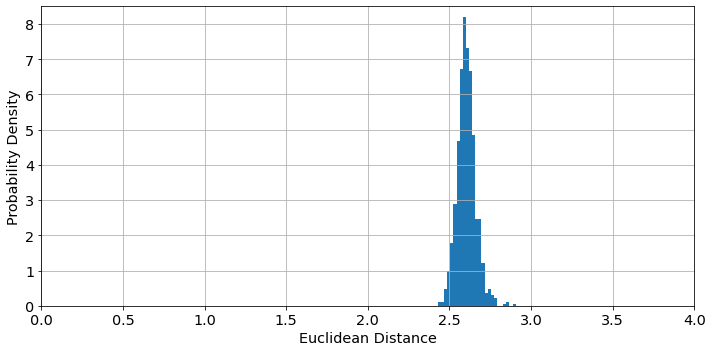

In [27]:
randomvecs = np.random.uniform(-1,1,[numpoints,100])
distNNRecord = []
for ii in np.arange(0,randomvecs.shape[0]-1):
  distRecord = []
  for jj in np.arange(ii+1,randomvecs.shape[0]):
    distRecord.append(np.sqrt( np.sum( ( randomvecs[ii,:]-randomvecs[jj,:] )**2 )))
  distNNRecord.append(np.min(distRecord))
fig, ax = plt.subplots()
N, bins, _ = ax.hist(np.sqrt(distNNRecord),25,density=True)
ax.set(xlim=[0,4],ylim=[0,8.5])
ax.set(ylabel='Probability Density',xlabel='Euclidean Distance')
fig.tight_layout(); plt.grid(); plt.show()

# The Curse of Dimensionality

- As the number of dimensions grows: 
  - more and more data is needed to fill the space. 
  - random observations become equally far from each other.
  - finding nearest neighbors requires greatly expanding neighborhoods
  - To counter, need dataset size grows exponential with dimension
- *Good practice*: Find a few dimensions that are most important.
    - Naive Bayes
    - Dimensionality reduction via PCA (today)
    - Feature selection (lecture 7)

# Another interesting thing

For points sampled from $[-1,1]^{d}$, how far do they lie from the origin (center of the hypercube)?

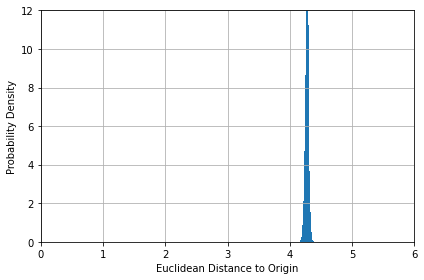

In [5]:
import numpy as np
import matplotlib.pyplot as plt
d = 1000
numpoints = 10000
randomvecs = np.random.uniform(-1,1,[numpoints,d])

distRecord = []
for ii in np.arange(0,randomvecs.shape[0]):
    distRecord.append(np.sqrt(np.sum( ( randomvecs[ii,:])**2 )))

fig, ax = plt.subplots()
N, bins, _ = ax.hist(np.sqrt(distRecord),15,density=True)

ax.set(xlim=[0,6],ylim=[0,12])
ax.set(ylabel='Probability Density',xlabel='Euclidean Distance to Origin')
fig.tight_layout(); plt.grid(); plt.show()

# Another interesting thing

For points sampled from $\mathcal{N}(\mathbf{0},1) \in \mathbb{R}^{100}$, how far do they lie from the origin (center of the hypersphere)?

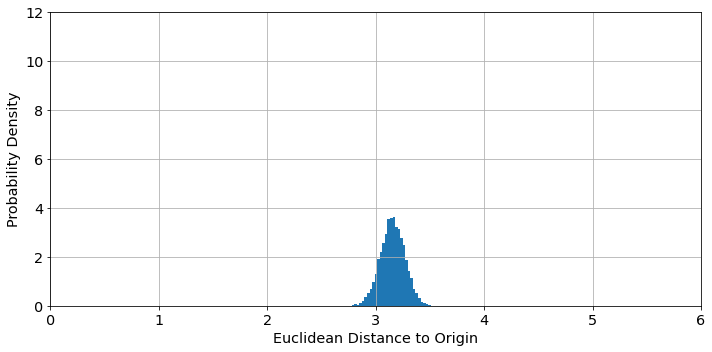

In [63]:
d = 100
numpoints = 10000
randomvecs = np.random.normal(size=[numpoints,d])
distRecord = []
for ii in np.arange(0,randomvecs.shape[0]):
    distRecord.append(np.sqrt( np.sum( ( randomvecs[ii,:]-np.zeros((1,d)))**2 )) )

fig, ax = plt.subplots()
N, bins, _ = ax.hist(np.sqrt(distRecord),35,density=True)

ax.set(xlim=[0,6],ylim=[0,12])
ax.set(ylabel='Probability Density',xlabel='Euclidean Distance to Origin')
fig.tight_layout(); plt.grid(); plt.show()